In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define the objective function
def objective_function(params):
    # Hyperparameters
    learning_rate = params['learning_rate']
    hidden_size = params['hidden_size']
    batch_size = params['batch_size']

    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    val_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model, loss, and optimizer
    input_size = 28 * 28  # MNIST images are 28x28
    num_classes = 10       # 10 digits
    model = SimpleNN(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    num_epochs = 5  # Keep it short for demonstration
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images = images.reshape(-1, input_size)  # Flatten the images
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate on the validation set
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.reshape(-1, input_size)
            outputs = model(images)
            val_loss += criterion(outputs, labels).item()

    # Return the average validation loss
    return val_loss / len(val_loader)

# Define the search space for Bayesian Optimization
space = [
    Real(0.0001, 0.1, name='learning_rate'),
    Integer(32, 256, name='hidden_size'),
    Integer(32, 256, name='batch_size')
]

# Define the objective function for Bayesian Optimization
@use_named_args(space)
def objective(**params):
    return objective_function(params)

# Run Bayesian Optimization
result = gp_minimize(
    func=objective,
    dimensions=space,
    n_calls=20,  # Number of evaluations
    random_state=42,
    verbose=True
)

# Print the best result
print("Best validation loss:", result.fun)
print("Best hyperparameters:")
print(f"Learning rate: {result.x[0]}")
print(f"Hidden size: {result.x[1]}")
print(f"Batch size: {result.x[2]}")

# Plot the convergence of Bayesian Optimization
from skopt.plots import plot_convergence
plot_convergence(result)
plt.show()

Iteration No: 1 started. Evaluating function at random point.
Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 484kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.94MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.80MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



ValueError: batch_size should be a positive integer value, but got batch_size=207

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 80.5009
Function value obtained: 2.3032
Current minimum: 2.3032
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 85.5411
Function value obtained: 2.1685
Current minimum: 2.1685
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 81.9459
Function value obtained: 1.4324
Current minimum: 1.4324
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 67.2257
Function value obtained: 1.0869
Current minimum: 1.0869
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 64.6354
Function value obtained: 2.3020
Current minimum: 1.0869
Iteration No: 6 started. Evalu

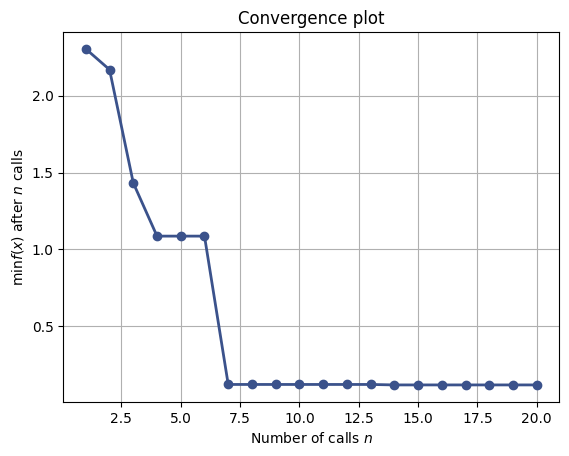

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define the objective function
def objective_function(params):
    # Hyperparameters
    learning_rate = params['learning_rate']
    hidden_size = int(params['hidden_size'])  # Ensure hidden_size is an integer
    batch_size = int(params['batch_size'])    # Ensure batch_size is an integer

    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    val_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model, loss, and optimizer
    input_size = 28 * 28  # MNIST images are 28x28
    num_classes = 10       # 10 digits
    model = SimpleNN(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    num_epochs = 5  # Keep it short for demonstration
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images = images.reshape(-1, input_size)  # Flatten the images
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate on the validation set
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.reshape(-1, input_size)
            outputs = model(images)
            val_loss += criterion(outputs, labels).item()

    # Return the average validation loss
    return val_loss / len(val_loader)

# Define the search space for Bayesian Optimization
space = [
    Real(0.0001, 0.1, name='learning_rate'),
    Integer(32, 256, name='hidden_size'),
    Integer(32, 256, name='batch_size')
]

# Define the objective function for Bayesian Optimization
@use_named_args(space)
def objective(**params):
    return objective_function(params)

# Run Bayesian Optimization
result = gp_minimize(
    func=objective,
    dimensions=space,
    n_calls=20,  # Number of evaluations
    random_state=42,
    verbose=True
)

# Print the best result
print("Best validation loss:", result.fun)
print("Best hyperparameters:")
print(f"Learning rate: {result.x[0]}")
print(f"Hidden size: {result.x[1]}")
print(f"Batch size: {result.x[2]}")

# Plot the convergence of Bayesian Optimization
from skopt.plots import plot_convergence
plot_convergence(result)
plt.show()

In [2]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.2 MB/s eta 0:00:00
